# Trid

Consider the Trid function
 \begin{equation}
 \label{eq:model}
f(x)=\sum_{i=1}^{d} (x_i - 1)^2 - \sum_{i=1}^{d} x_i x_{i-1},
\end{equation}
where $x \in \mathfrak{X}=[-d^2,d^2]^d$.



# Import libraries

In [1]:
import numpy as np 
from numpy import linalg as LA
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import textwrap

import metod_alg as mt
from metod_alg import metod_algorithm_functions as mt_alg
from metod_alg import objective_functions as mt_obj
import tqdm
import seaborn as sns
import SALib
from SALib.sample import sobol_sequence

# Contour Plot

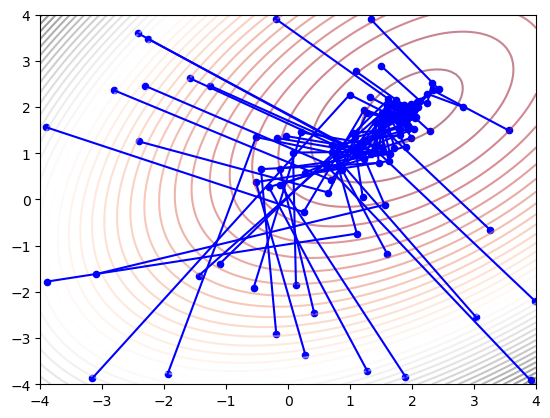

In [3]:
np.random.seed(18)
test_num = 100
d = 2
bounds_p_1 = -d**2
bounds_p_2 = d**2
num_p = 40
f = mt_obj.trid_func
g = mt_obj.trid_grad

args = (d, )
x = np.linspace(bounds_p_1, bounds_p_2, test_num)
y = np.linspace(bounds_p_1, bounds_p_2, test_num)
Z = np.zeros((test_num, test_num))
X, Y = np.meshgrid(x, y)
for i in range(test_num):
    for j in range(test_num):
        x1_var = X[i, j]
        x2_var = Y[i, j]
        Z[i, j] = f(np.array([x1_var, x2_var]).reshape(2, ), *args)

relax_sd_it = 1
usage = 'metod_algorithm'
tolerance=0.0001
projection=False
option = 'forward_backward_tracking'
met = 'None'
initial_guess=0.005

for _ in range(num_p):
    x = np.random.uniform(bounds_p_1, bounds_p_2, (d,))
    descended_x_points, its = (mt_alg.apply_sd_until_stopping_criteria
                              (x, d, projection, tolerance, option,
                               met, initial_guess, args, f, g, 
                               bounds_p_1, bounds_p_2, usage, relax_sd_it))

    chosen_x1 = descended_x_points[0:descended_x_points.shape[0]][:,0]
    chosen_x2 = descended_x_points[0:descended_x_points.shape[0]][:,1]

    plt.scatter(chosen_x1, chosen_x2, s=20, color='blue')
    plt.plot(chosen_x1, chosen_x2, 'blue')

plt.contour(X, Y, Z, 50, cmap='RdGy', alpha=0.5)

# Results

For all results $d=10$ and $N=50$.

In [7]:
d = 10
beta_list = [0.1]
m_list = [1]
    
avg_grad = np.zeros((len(m_list) * len(beta_list), 100, 500))

total_no_local_minimizers_metod = np.zeros((len(m_list), len(beta_list), 100))
time_taken_metod = np.zeros((len(m_list), len(beta_list), 100))
extra_descents_metod = np.zeros((len(m_list), len(beta_list), 100))
func_val_metod = np.zeros((len(m_list), len(beta_list), 100))

df_mult = pd.read_csv('trid_sd_metod_beta_0.1_m=1_d=10_random_50.csv')
total_no_local_minimizers_mult = np.array(df_mult['number_minimizers_per_func_multistart'])
time_taken_mult = np.array(df_mult['time_multistart'])
func_val_mult = np.array(df_mult['min_func_val_multistart'])
test = np.array(df_mult['number_minimizers_per_func_metod'])

# index_all = 0
# index_m = 0
# for m in m_list:
#     index_beta = 0
#     for beta in beta_list:
#         df_metod = pd.read_csv('trid_metod_beta_%s_m=%s_d=10_random_50.csv'% (beta, m))
#         total_no_local_minimizers_metod[index_m, index_beta] = np.array(df_metod['number_minimizers_per_func_metod'])
#         time_taken_metod[index_m, index_beta] = np.array(df_metod['time_metod'])
#         func_val_metod[index_m, index_beta] = np.array(df_metod['min_func_val_metod'])
#         if beta == 0.1 and m == 1:
#             assert(np.all(total_no_local_minimizers_metod[index_m, index_beta] == test))
#         extra_descents_metod[index_m, index_beta] = np.array(df_metod['number_extra_descents_per_func_metod'])

#         avg_grad[index_all] = np.genfromtxt('trid_grad_norm_beta_%s_m=%s_d=10_random_50.csv'% (beta, m), delimiter=',')
#         index_beta += 1
#         index_all += 1
#     index_m += 1

In [8]:
total_no_local_minimizers_mult

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
test

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [10]:
np.array(df_mult['number_extra_descents_per_func_metod'])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [57]:
total_no_local_minimizers_mult == test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [58]:
test

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 4., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 4., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 4., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.])

In [59]:
np.array(df_mult['number_extra_descents_per_func_metod'])

array([53., 43., 57., 54., 40., 47., 39., 45., 47., 48., 42., 53., 54.,
       36., 53., 47., 56., 50., 61., 56., 59., 43., 55., 41., 42., 51.,
       35., 48., 44., 49., 48., 49., 43., 61., 41., 62., 54., 43., 42.,
       43., 48., 57., 52., 57., 50., 50., 50., 40., 51., 52., 41., 54.,
       40., 47., 54., 48., 52., 50., 45., 48., 54., 46., 43., 60., 53.,
       49., 54., 37., 40., 51., 41., 52., 54., 44., 55., 46., 42., 46.,
       53., 47., 56., 50., 57., 51., 52., 52., 61., 53., 49., 45., 52.,
       67., 49., 54., 51., 49., 50., 45., 41., 59.])

In [10]:
np.array(df_mult['time_metod']) / np.array(df_mult['time_multistart'])

array([0.68077547, 0.54100868, 0.81001014, 0.60411696, 0.56141288,
       0.57418507, 0.55506379, 0.58892296, 0.57483125, 0.65150728,
       0.53524271, 0.63377536, 0.68588316, 0.48777765, 0.52281426,
       0.57990956, 0.76996363, 0.64465454, 0.74097579, 0.66282351,
       0.74520251, 0.57268519, 0.68132674, 0.52998083, 0.51772478,
       0.63996203, 0.45365273, 0.57047358, 0.58376671, 0.61288788,
       0.53746507, 0.62594968, 0.56124554, 0.77811545, 0.51286002,
       0.69859373, 0.59711192, 0.5867975 , 0.53670184, 0.51135847,
       0.61625616, 0.74475198, 0.66465686, 0.69495758, 0.63443534,
       0.6074395 , 0.61962324, 0.49576441, 0.64144662, 0.63432316,
       0.5263817 , 0.65065603, 0.50227373, 0.53904797, 0.67693728,
       0.59545927, 0.66597242, 0.64507652, 0.57283838, 0.60157461,
       0.67409233, 0.57343476, 0.55924521, 0.71783005, 0.62175109,
       0.61238687, 0.65059578, 0.49421619, 0.52597394, 0.62916075,
       0.49711224, 0.68961382, 0.67437768, 0.56563648, 0.67981

In [ ]:
total_no_minimizers_prop = total_no_local_minimizers_metod / total_no_local_minimizers_mult

In [ ]:
time_taken_prop = time_taken_metod / time_taken_mult

In [ ]:
for j in range(len(beta_list) * len(m_list)):
    for k in range(j+1, len(beta_list) * len(m_list)):
            assert(np.all(np.round(avg_grad[k], 5) == np.round(avg_grad[j], 5)))

In [ ]:
same_global_min = np.zeros((len(m_list), len(beta_list)))
same_minimizer = np.zeros((len(m_list), len(beta_list)))
mean_excessive_descents = np.zeros((len(m_list), len(beta_list)))
for i in range(len(m_list)):
    for j in range(len(beta_list)):
        assert(np.all(total_no_local_minimizers_mult >=  total_no_local_minimizers_metod[i, j]))
        same_global_min[i, j] = np.where(np.round(func_val_mult, 2) == np.round(func_val_metod[i, j], 2))[0].shape[0]
        same_minimizer[i, j] = np.sum(total_no_local_minimizers_metod[i, j]) / np.sum(total_no_local_minimizers_mult)
        mean_excessive_descents[i, j] = np.mean(extra_descents_metod[i, j])

In [ ]:
same_global_min

In [ ]:
same_minimizer

In [12]:
number_its = np.genfromtxt('trid_no_its_mult_beta_0.1_m=1_d=10_random_50.csv', delimiter=',')
store_mean_its = np.zeros((100))
store_min_its = np.zeros((100))
store_mean_norm_grad = np.zeros((100))
for j in range(100):
    store_mean_its[j] = np.mean(number_its[j])
    store_min_its[j] = np.min(number_its[j])
#     store_mean_norm_grad[j] = 1 / np.mean(avg_grad[0][j])

In [13]:
store_mean_its

array([262.16, 255.86, 262.82, 263.54, 256.08, 265.14, 264.32, 261.28,
       265.3 , 261.14, 263.68, 263.72, 261.32, 268.14, 269.36, 264.22,
       255.4 , 264.72, 262.62, 264.92, 263.36, 256.6 , 258.42, 256.14,
       254.38, 253.3 , 264.5 , 259.34, 262.96, 267.94, 264.08, 263.68,
       259.4 , 263.78, 259.92, 264.66, 264.58, 264.3 , 261.1 , 267.28,
       260.42, 253.8 , 264.74, 260.08, 254.  , 260.62, 256.58, 261.24,
       261.82, 263.64, 263.56, 261.68, 259.74, 258.66, 266.76, 258.48,
       262.44, 267.  , 267.7 , 264.1 , 264.3 , 260.06, 259.4 , 259.86,
       266.8 , 254.24, 259.66, 261.64, 264.32, 262.24, 262.7 , 260.56,
       262.46, 260.48, 261.44, 255.04, 256.46, 260.14, 262.66, 268.38,
       262.32, 266.64, 263.2 , 262.88, 260.7 , 266.38, 261.62, 259.22,
       261.9 , 263.4 , 261.28, 264.96, 259.98, 262.68, 264.16, 259.2 ,
       257.56, 259.32, 264.4 , 261.96])

In [14]:
store_min_its

array([137., 145., 195., 171., 208., 203., 213., 207., 177., 177., 177.,
       215., 209., 214., 213., 184., 161., 208., 209., 199., 209., 171.,
       162., 150., 187., 165., 221., 201., 155., 183., 189., 195., 172.,
       192., 125., 219., 196., 187., 183., 168., 169., 173., 207., 136.,
       165., 177., 169., 219., 177., 193., 210., 209., 179., 187., 207.,
       203., 195., 217., 193., 165., 211., 189., 153., 196., 221.,  87.,
       203., 156., 186., 168., 201., 181., 191., 210.,  88., 177., 191.,
       165., 207., 200., 207., 213., 214., 213., 110., 199., 205., 185.,
       166., 161., 169., 149., 155., 123., 211., 121., 192., 178., 193.,
       175.])

In [ ]:
store_mean_norm_grad

In [ ]:
def set_box_color(bp, color):
    """Set colour for boxplot."""
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)
    
def create_boxplots_ratio(arr1, arr2, labels, ticks):
    plt.figure(figsize=(7, 5))
    
    max_num = max(np.max(arr1), np.max(arr2))
    plt.ylim(0, max_num + 0.1)
    bpl = plt.boxplot(arr1.T,
                      positions=np.array(range(len(arr1)))*2.0-0.4)
    bpr = plt.boxplot(arr2.T,
                      positions=np.array(range(len(arr2)))*2.0+0.4)
    set_box_color(bpl, 'green')
    set_box_color(bpr, 'navy')
    plt.plot([], c='green', label=labels[0])
    plt.plot([], c='navy', label=labels[1])
    plt.legend(bbox_to_anchor=(0.99, 1.025), loc='upper left',
               prop={'size': 15})
    plt.xlabel(r'$\beta$', size=14)
    plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks, size=15)
    plt.yticks(fontsize=14)
    plt.tight_layout()

# Total number of local minima

In [ ]:
ticks = [beta_list[0],
          beta_list[1],
          beta_list[2]]
labels = [r'$M =$ %s' % (m_list[0]),
        r'$M =$ %s' % (m_list[1])]

In [ ]:
create_boxplots_ratio(total_no_minimizers_prop, total_no_minimizers_prop_diff, labels, ticks)

# Efficiency

In [ ]:
create_boxplots_ratio(time_taken_prop[0], time_taken_prop[1], labels, ticks)

# Excessive descents

In [ ]:
create_boxplots_ratio(extra_descents_metod[0], extra_descents_metod[1], labels, ticks)